# Линейная регрессия

## Задача 1

Загрузите данные из набора Forest Fires (файл forestfires.csv) о лесных пожарах в Португалии. Задача состоит в том, чтобы с помощью линейной регрессии научиться предсказывать координату area (площадь пожара) в виде линейной комбинации других данных. 
    

Чтобы работать с числовыми координатами, нечисловые координаты (month, day) нужно перевести в числовые. Для простоты можно заменить координату month на индикатор летнего сезона, а координату day не использовать вообще. По желанию можно сделать преобразование другим способом. Также добавьте координату, тождественно равную единице (вес при этой координате  интерпретируется как сдвиг).

Разбейте выборку на две части в соотношении 7:3 (перемешав её с помощью random.shuffle). По первой части постройте регрессионную модель. Примените модель ко второй части выборки и посчитайте по ней среднеквадратичную ошибку.

Для переменной area выполните преобразование $f(x) = ln(x+c)$ и постройте для нее новую регрессионную модель. Посчитайте среднеквадратичную ошибку для преобразованных значений. При каком $c$ предсказания получаются лучше всего? 

При выбранном $c$ сделайте разбиение выборки в соотношении 7:3 разными способами (перемешивая каждый раз). Найдите способ оценить разброс качества от разбиения. Сильно ли меняется качество? Сделайте выводы.

### Теоретическая часть

Оценка по методу наименьших квадратов имеет вид
$$ \theta^{*} = (Z^{T}Z)^{-1}Z^{T}X. $$
Именно это формулу будем использовать для нахождения весов в линейной регрессионной модели.

### Решение

In [1]:
#импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#загрузим данные из файла forestfires.csv
fires_data = pd.read_csv('forestfires.csv')

In [3]:
#посмотрим на первые записи в данном файле
fires_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
#функция для трансформации признака month (заменяем категориальный признак на индикатор летнего сезона)
def month_tranform(month):
    if (month == 'jun' or month == 'jul' or month == 'aug'):
        return 1
    else:
        return 0

In [5]:
#применяем функцию трансформации признака к данным
fires_data['month'] = fires_data['month'].apply(month_tranform)

In [6]:
#удаляем из данных признак дня недели
fires_data = fires_data.drop(['day'], axis = 1)

In [7]:
#посмотрим на записи в уже изменненных данных
fires_data.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,0,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
#посмотрим на среднее значение значение целевого признака area
print("Среднее значение целевого признака: {}".format(fires_data['area'].mean()))

Среднее значение целевого признака: 12.8472920696


In [9]:
#получим numpy массив данных из pandas dataframe
data = np.array(fires_data.values[:, :])

In [10]:
#добавим координату, тождественную равную единице
size = np.shape(data)[0]
ones = np.reshape(np.ones(size), (size, 1))

data = np.hstack((ones, data))

In [11]:
#перемешаем выборку
random.shuffle(data)

In [12]:
#создадим массивы X и y, где X - выборка, y - признак area
X = np.array(data[:, 0:12])
y = np.array(data[:, 12])

In [13]:
#разобьем данные на две части: train и test в отношении 7:3
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3)

In [14]:
#функция для нахождения оптимальных параметров линейной регрессионой модели
def optimal_parameters(X, y):
    return np.linalg.solve(np.dot(X.transpose(), X), np.dot(X.transpose(), y))

In [15]:
#находим оптимальные веса модели
theta = optimal_parameters(X_train, y_train)

In [16]:
#находим предсказанные значения площади area на тестовой выборке
y_pred = np.dot(X_test, theta)

In [17]:
#функция для нахождения среднеквадратичной ошибки прогноза
def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [18]:
print("Среднеквадратичная ошибка проноза линейного регрессионной модели: {}".format(mean_squared_error(y_pred, y_test))) 
print("Среднеквадратичное отклонение: {}".format(np.sqrt(mean_squared_error(y_pred, y_test)))) 

Среднеквадратичная ошибка проноза линейного регрессионной модели: 585.413292297
Среднеквадратичное отклонение: 24.1953155032


In [19]:
#функция для применения указанного преобразования признака area
def transform_area(area, constant):
    return np.log(area + constant)

In [20]:
#функция для получения ошибок прогноза в зависимости от константы в преобразовании признака area
def get_error_depend_on_c(X_train, X_test, y_train, y_test, constants):
    errors = np.array([])
    
    for const in constants:
        y_train_curr = transform_area(y_train, const)
        #y_test_curr = transform_area(y_test, const)
        theta = optimal_parameters(X_train, y_train_curr)
        predictions = np.dot(X_test, theta)
        inv_transform_predictions = np.exp(predictions) - const
        errors = np.append(errors, mean_squared_error(y_test, inv_transform_predictions))
    
    return errors

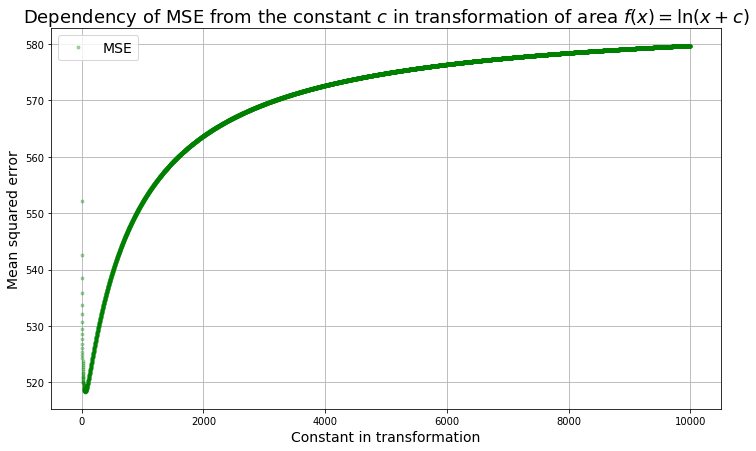

In [21]:
#находим массив ошибок в зависимости от константы в преобразовании признака area
constants = np.linspace(0.1, 10000, 10000)
errors = get_error_depend_on_c(X_train, X_test, y_train, y_test, constants)

#строим график зависимости среднеквадратичной ошибки прогноза от константы в преобразовании признака area
plt.figure(figsize = (12, 7))
plt.plot(errors, marker = 'o', linestyle = 'none', markersize = '3', alpha = 0.3, color = 'g', label = 'MSE')
plt.title(r'Dependency of MSE from the constant $c$ in transformation of area $f(x) = \ln{(x + c)}$', fontsize = 18)
plt.xlabel('Constant in transformation', fontsize = 14)
plt.ylabel('Mean squared error', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()
plt.show()

In [22]:
#находим оптимальное значение константы при трансформации признака area
optimal_const = constants[np.argwhere(errors == errors.min())[0][0]]
print optimal_const

56.1050405040504


In [23]:
def get_errors_with_opt_const(X, y, num_exp = 1000, optimal_const = optimal_const):
    errors = np.array([])
    
    for i in range(num_exp):
        (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3)
        y_train = transform_area(y_train, optimal_const)
        theta = optimal_parameters(X_train, y_train)
        predictions = np.dot(X_test, theta)
        inv_transform_predictions = np.exp(predictions) - optimal_const
        errors = np.append(errors, mean_squared_error(y_test, inv_transform_predictions))
    
    return errors

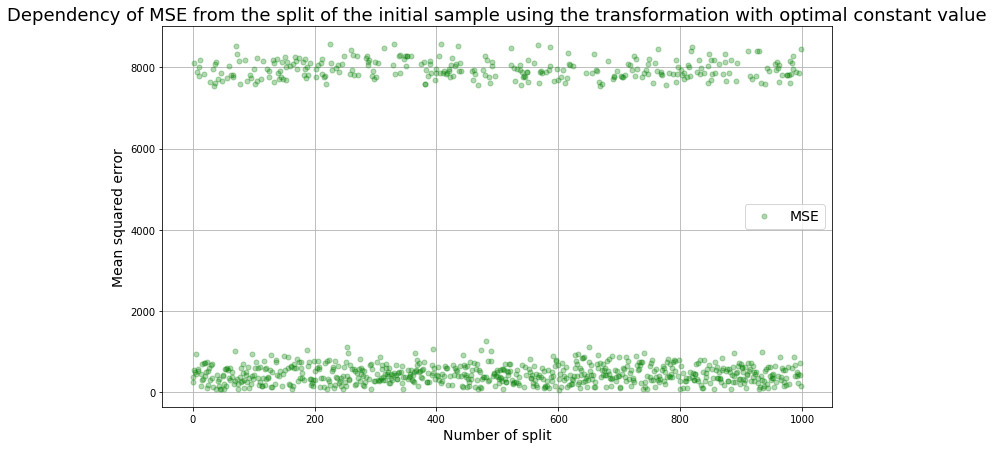

In [24]:
errors = get_errors_with_opt_const(X, y)

plt.figure(figsize = (12, 7))
plt.plot(errors, marker = 'o', linestyle = 'none', markersize = '5', alpha = 0.3, color = 'g', label = 'MSE')
plt.title(r'Dependency of MSE from the split of the initial sample using the transformation with optimal constant value', fontsize = 18)
plt.xlabel('Number of split', fontsize = 14)
plt.ylabel('Mean squared error', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()
plt.show()

### Выводы

<div style="text-align: justify">
Заметим, что как при применении преобразования признака area, так и без него, всегда получаем большую среднеквадратичную ошибку прогноза линейной регрессионной модели. При применении преобразования ошибка уменьшается, но незначительно. Среднеквадратичное отклонение получается больше, чем среднее значение целевого признака. Можно сказать, что линейная модель плохо применима для данной задачи. Также видим, что качество сильно зависит от разбиения выборки, что и логично, так как разбиения строятся случайно, то нет гарантий что-то какой-то конкретный объект попадает в обучающую или тестовую выборку. Из-за этого так сильно отличается качество. Часто применяется подход, называемый кросс-валидацией, для более правильной оценки работы алгоритма. В этом случае выборка делится на $k$ блоков примерно одинакового размера. Далее по очереди каждый из этих блоков используется в качестве тестового, а все остальные - в качестве обучающей выборки. Затем получаются $k$ показателей качества, и они усредняются.
</div>

## Задача 2

Пусть $$X_i = \beta_1+i\beta_2+\varepsilon_0+\ldots+\varepsilon_i,\, i= 0, 1, \ldots, n$$ - расстояния, которые проехал трамвай за $i$ секунд по показанию датчика. Здесь $\beta_1$ - начальное расстояние, $\beta_2$ - скорость трамвая, $\varepsilon_0$ - ошибка начального показания датчика. Трамвай едет с постоянной скоростью, и через каждую секунду датчик фиксирует расстояние, которое проехал трамвай. Отсчет времени идет от предыдущего замера, причем отсчет происходит с ошибкой. Для $i = 1, \ldots, n$ величина $\varepsilon_i$ есть ошибка приращения расстояния, то есть $\varepsilon_i = \varepsilon_i^t \beta_2,$ где $\varepsilon_i^t$ - ошибка отсчета времени. Все ошибки $\varepsilon_i$ независимы и распределены по закону $N(0, \sigma^2)$. 

Сведите задачу к линейной модели и найдите оценки наименьших квадратов для начального расстояния $\beta_1$ и скорости $\beta_2,$ а также несмещенную оценку для $\sigma^2,$ из которой выразите оценку дисперсии отсчета времени. 

Данные возьмите из файла Regression.csv. Сделайте выводы.

### Теоретическая часть и аналитическое решение задачи

Рассмотрим величину $Y_{i} = X_{i} - X_{i - 1}, \; Y_{0} = X_{0}$. Заметим, что $Y_{0} = \beta_{1} + \varepsilon_{0}, \; Y_{i} = \beta_{2} + \varepsilon_{i}$. Тогда матрица базиса $Z$ имеет вид $Z = \pmatrix{1\;0 \\ 0\;1 \\ 0\;1 \\ \ldots \\ 0\;1}$, вектор $\varepsilon = \pmatrix{\varepsilon_{0} \\ \varepsilon_{1} \\ \ldots \\ \varepsilon_{n}}$. Имеем $Y = Z \pmatrix{\beta_{1} \\ \beta_{2}} + \varepsilon$. 

Тогда оценка наименьших квадратов для $\beta_{1}$ и $\beta_{2}$ равна $\pmatrix{\beta_{1} \\ \beta_{2}} =(Z^{T}Z)^{-1}Z^{T} = \pmatrix{Y_{0} \\ \frac{Y_{1} + \ldots + Y_{n}}{n}} = \pmatrix{X_{0} \\ \frac{X_{n} - X_{0}}{n}}$.

Несмещенная оценка для $\sigma^{2}$ равна $\sigma^{2} = \frac{1}{n - 1}\|Y - Z\theta^{*}\|^{2} = \frac{1}{n - 1}\sum\limits_{i = 1}^{n}{\left((X_{i} - X_{i - 1}) - \frac{X_{n} - X_{0}}{n}\right)^{2}}$. 

Оценка дисперсии отсчета времени: $Var{(\varepsilon^{t})} = \frac{\sigma^{2}}{\beta_{2}^{2}}$.

### Решение задачи

In [25]:
#загрузим данные из файла regression.csv
data = np.genfromtxt('regression.csv')

'''посчитаем оценку наименьших квадратов параметров beta_1 и beta_2, 
а также несмещенную оценку sigma_2 и оценку дисперсии отсчета времени'''

n = data.size - 1
beta_1 = data[0]
beta_2 = (data[n] - data[0]) / n
sigma_2 = 1. / (n - 1) * np.sum(np.array([(data[i] - data[i - 1] - beta_2) ** 2 for i in range(1, n + 1)]))
time_var = sigma_2 / beta_2 ** 2

In [26]:
print("Оценка наименьших квадратов для начального расстояния: {}".format(beta_1))
print("Оценка наименьших квадратов для скорости: {}".format(beta_2))
print("Несмещенная оценка дисперсии: {}".format(sigma_2))
print("Оценка дисперсии отсчета времени: {}".format(time_var))

Оценка наименьших квадратов для начального расстояния: 82.0053
Оценка наименьших квадратов для скорости: 11.970782983
Несмещенная оценка дисперсии: 1.52524487161
Оценка дисперсии отсчета времени: 0.0106437449249


### Выводы

<div style="text-align: justify">
По оценкам можно сделать вывод, что показания датчика являются достаточно точными, так как оценка дисперсии приращения расстояния небольшая. Получили, что линейная модель хорошо применима для решения такой задачи. Также получено, что ошибка отсчета времени имеет малое значение.
</div>